In [ ]:
## Q3. "Plausibly Exogenous"

In [11]:
### Data Generating Process Allowing for gamma different from 0

In [1]:
# Set parameters
(beta, pi) = (2, 1)     
sigma = {'u':1/2,'v':1/3,'z':0.7}

In [2]:
# Define linear dgp function
from scipy.stats import distributions as iid

def linear_dgp(N, gamma):
    u = iid.norm(scale=sigma['u']).rvs(N)
    v = iid.norm(scale=sigma['v']).rvs(N)
    Z = iid.norm(scale=sigma['z']).rvs(N)
   
    X = Z*pi + v
    y = X*beta + Z*gamma + u

    df = pd.DataFrame({'y':y,'x':X,'z':Z,'Constant':1})

    return df[['y']],df[['Constant','x']],df[['Constant','z']]

In [3]:
# Draw estimates for beta = 2 when gamma = 0.1
import numpy as np
import pandas as pd

def draw_b(N, dgp, gamma):
    """
    Generate a random variate $b$ from a sample of $N$ draws from a function dgp.
    """
    y,X,Z =  dgp(N, gamma)
    return np.linalg.solve(Z.T@X,Z.T@y) # Solve normal eqs for b

b = draw_b(1000, linear_dgp, 0.1)[1]

print(b)

[2.10559107]


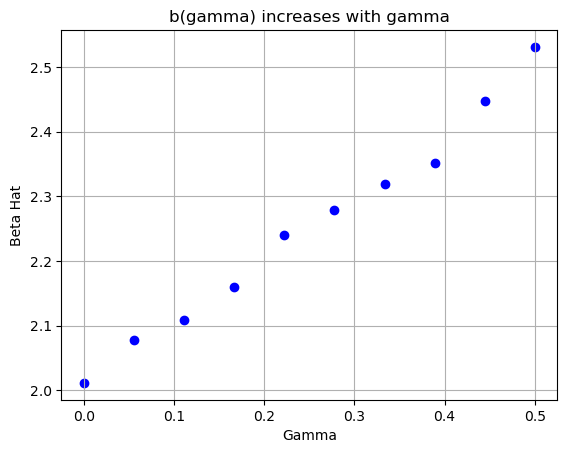

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10 equally spaced input points between 0 and 5
gamma_vals = np.linspace(0, 0.5, 10)

# Calculate output values using the function
beta_hat = np.zeros(10)
for g in range(10):
    beta_hat[g] = draw_b(1000, linear_dgp, gamma_vals[g])[1]

# Create a scatter plot
plt.scatter(gamma_vals, beta_hat, color='b', label='Estimated Beta')
plt.xlabel('Gamma')
plt.ylabel('Beta Hat')
plt.title('b(gamma) increases with gamma')
plt.grid(True)

# Show the plot
plt.show()

In [5]:
# (2) Calculate a region A over which one might fail to reject (i.e.,
 #Accept) the null hypothesis that b(gamma) = b(0) at a conventional
 #level of significance. Discuss

In [6]:
import pandas as pd
# First, let's estimate a gamma_hat from regressing y on X and Z
def draw_gamma(N, dgp, gamma):
    """
    Generate a random variate $gamma$ from a sample of $N$ draws from a function dgp.
    """
    y,X,Z =  dgp(N, gamma)
    tmp = pd.concat([X,Z.iloc[:, 1]], axis = 1) # tmp is a matrix with constants, X, and Z    
   
    return np.linalg.solve(tmp.T@tmp,tmp.T@y) # Solve normal eqs for b

gamma_hat = draw_gamma(1000, linear_dgp, 0.1)[2]
print(gamma_hat)

[0.10277586]


In [ ]:
# Our estimate for gamma is close to the true parameter = 0.1

In [ ]:
# Now, let's construct a 95% confidence interval centered at gamma_hat .... this thought is based on lecture
# this week, but i'm not sure if it's the right way to proceed 

In [ ]:
# (3) Further modify the framework so that the covariance of Z and
#X is equal to a parameter sigma_XZ. Calculate the set B of pairs (gamma, sigma_XZ) 
#such that one would fail to reject the same null hypothesis at the same level of significance. Discuss.

In [7]:
# set parameters
sigma = {'u':1/2,'v':1/3,'z':0.7}
# Define modified linear dgp function
from scipy.stats import distributions as iid
import numpy as np

def linear_dgp_cov(N, gamma, sigmaxz):
    u = iid.norm(scale=sigma['u']).rvs(N)
    means = np.array([1, 2])
    cov_xz = np.array([[sigma['v'], sigmaxz], [sigmaxz, sigma['z']]])

    [X, Z] = np.random.multivariate_normal(means, cov_xz, N)

    y = X*beta + Z*gamma + u

    df = pd.DataFrame({'y':y,'x':X,'z':Z,'Constant':1})

    return df[['y']],df[['Constant','x']],df[['Constant','z']]

# Modify draw_b
def draw_b_cov(N, gamma, sigmaxz):
    """
    Generate a random variate $b$ from a sample of $N$ draws from a function dgp.
    """
    y,X,Z =  linear_dgp_cov(N, gamma, sigmaxz)
    
    print(np.cov(Z,X)[0][1])
    
    return np.linalg.solve(Z.T@X,Z.T@y) # Solve normal eqs for b

In [8]:
sigma = {'u':1/2,'v':1/3,'z':0.7}

# Define modified linear dgp function
from scipy.stats import distributions as iid
import numpy as np

def linear_dgp_cov(N, gamma, sigma_xz):
    u = iid.norm(scale=sigma['u']).rvs(N)
    means = np.array([1, 2])
    cov_xz = np.array([[sigma['v'], sigma_xz], [sigma_xz, sigma['z']]])

    [X, Z] = np.random.multivariate_normal(means, cov_xz, N)

    y = X*beta + Z*gamma + u

    df = pd.DataFrame({'y':y,'x':X,'z':Z,'Constant':1})

    return df[['y']],df[['Constant','x']],df[['Constant','z']]

# Modify draw_b
def draw_b_cov(N, gamma, sigma_xz):
    """
    Generate a random variate $b$ from a sample of $N$ draws from a function dgp.
    """
    y,X,Z =  linear_dgp_cov(N, gamma, sigma_xz)
    
    print(np.cov(Z,X)[0][1])
    
    return np.linalg.solve(Z.T@X,Z.T@y) # Solve normal eqs for b


In [9]:
b = draw_b_cov(1000, 0.05, 0.5)[1]  # sigma_xz set to 0.5

/tmp/ipykernel_73/398764361.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  [X, Z] = np.random.multivariate_normal(means, cov_xz, N)


ValueError: too many values to unpack (expected 2)

In [ ]:
#The error I'm getting when I call linear_dgp_cov is that it expects 2 variables but it should have 3 i think